In [1]:
import pandas as pd
url = "https://www.health.state.mn.us/diseases/coronavirus/situation.html#hosp1"

dfs = pd.read_html(url)

In [2]:
for k, df in enumerate(dfs):
    if any(isinstance(c, str) and ("date" in c.lower() or "day" in c.lower()) for c in df.columns):
        print(k, df.columns)

4 Index(['Date reported to MDH',
       'Completed tests reported from the MDH Public Health Lab (daily)',
       'Completed tests reported from external laboratories (daily)',
       'Total approximate number of completed tests'],
      dtype='object')
5 Index(['Specimen collection date', 'Positive cases',
       'Cumulative positive cases'],
      dtype='object')
6 Index(['Date reported', 'Newly reported deaths (daily)', 'Total deaths'], dtype='object')
7 Index(['Date reported', 'Hospitalized in ICU (daily)',
       'Hospitalized, not in ICU (daily)', 'Total hospitalizations',
       'Total ICU hospitalizations'],
      dtype='object')


In [3]:
# Want: deaths, ICU/hosp, new cases

cases = dfs[5]
assert "Positive cases" in cases.columns
assert "Cumulative positive cases" in cases.columns
print(cases.columns)
assert (cases.columns == ['Specimen collection date', 'Positive cases', 'Cumulative positive cases']).all()
cases.columns = ["Date reported", "Positive cases (daily)", "Total positive cases"]

deaths = dfs[6]
assert "Newly reported deaths (daily)" in deaths.columns
assert "Total deaths" in deaths.columns

icu = dfs[7]
print(icu.columns)
assert "Hospitalized in ICU (daily)" in icu.columns
assert "Total ICU hospitalizations" in icu.columns

Index(['Specimen collection date', 'Positive cases',
       'Cumulative positive cases'],
      dtype='object')
Index(['Date reported', 'Hospitalized in ICU (daily)',
       'Hospitalized, not in ICU (daily)', 'Total hospitalizations',
       'Total ICU hospitalizations'],
      dtype='object')


In [4]:
cases

,Date reported,Positive cases (daily),Total positive cases
0,3/5,1,1
1,3/6,0,1
2,3/7,1,2
3,3/8,0,2
4,3/9,3,5
...,...,...,...
172,8/24,857,72544
173,8/25,530,73074
174,8/26,154,73228
175,8/27,6,73234


In [5]:
df = pd.merge(cases, deaths, on="Date reported")
df = pd.merge(df, icu, on="Date reported")

In [6]:
df.to_csv("data/mn.csv", index=False)

In [7]:
df.head()

,Date reported,Positive cases (daily),Total positive cases,Newly reported deaths (daily),Total deaths,Hospitalized in ICU (daily),"Hospitalized, not in ICU (daily)",Total hospitalizations,Total ICU hospitalizations
0,3/21,24,327,1,1,4,2,12,4
1,3/22,22,349,0,1,5,5,12,5
2,3/23,44,393,0,1,5,7,21,5
3,3/24,51,444,0,1,7,8,25,7
4,3/25,58,502,0,1,12,14,35,12


In [8]:
from datetime import datetime, timedelta

def parse_datetime(x):
    month, day = x.split("/")
    return datetime(2020, int(month), int(day))

df["datetime"] = df["Date reported"].apply(parse_datetime)
df.columns

Index(['Date reported', 'Positive cases (daily)', 'Total positive cases',
       'Newly reported deaths (daily)', 'Total deaths',
       'Hospitalized in ICU (daily)', 'Hospitalized, not in ICU (daily)',
       'Total hospitalizations', 'Total ICU hospitalizations', 'datetime'],
      dtype='object')

In [9]:
assert (df.columns == ['Date reported', 'Positive cases (daily)',
       'Total positive cases', 'Newly reported deaths (daily)',
       'Total deaths', 'Hospitalized in ICU (daily)',
       'Hospitalized, not in ICU (daily)', 'Total hospitalizations',
       'Total ICU hospitalizations', "datetime"]).all()

df.columns

Index(['Date reported', 'Positive cases (daily)', 'Total positive cases',
       'Newly reported deaths (daily)', 'Total deaths',
       'Hospitalized in ICU (daily)', 'Hospitalized, not in ICU (daily)',
       'Total hospitalizations', 'Total ICU hospitalizations', 'datetime'],
      dtype='object')

In [10]:
df.columns

Index(['Date reported', 'Positive cases (daily)', 'Total positive cases',
       'Newly reported deaths (daily)', 'Total deaths',
       'Hospitalized in ICU (daily)', 'Hospitalized, not in ICU (daily)',
       'Total hospitalizations', 'Total ICU hospitalizations', 'datetime'],
      dtype='object')

In [11]:
import numpy as np
cols = [
    "Hospitalized in ICU (daily)",
    "Hospitalized, not in ICU (daily)",
    "Newly reported deaths (daily)",
]
in_df = [c in df.columns for c in cols]
print(in_df)
for c in cols:
    print(c)
    idx = df[c] == "-"
    df.loc[idx, c] = np.nan
    df[c] = df[c].astype("float32")

[True, True, True]
Hospitalized in ICU (daily)
Hospitalized, not in ICU (daily)
Newly reported deaths (daily)


In [12]:
df["in_hosp"] = df["Hospitalized in ICU (daily)"] + df["Hospitalized, not in ICU (daily)"]

In [13]:
df.dtypes

Date reported                               object
Positive cases (daily)                       int64
Total positive cases                         int64
Newly reported deaths (daily)              float32
Total deaths                                 int64
Hospitalized in ICU (daily)                float32
Hospitalized, not in ICU (daily)           float32
Total hospitalizations                       int64
Total ICU hospitalizations                   int64
datetime                            datetime64[ns]
in_hosp                                    float32
dtype: object

In [14]:
df.head()

,Date reported,Positive cases (daily),Total positive cases,Newly reported deaths (daily),Total deaths,Hospitalized in ICU (daily),"Hospitalized, not in ICU (daily)",Total hospitalizations,Total ICU hospitalizations,datetime,in_hosp
0,3/21,24,327,1.0,1,4.0,2.0,12,4,2020-03-21,6.0
1,3/22,22,349,0.0,1,5.0,5.0,12,5,2020-03-22,10.0
2,3/23,44,393,0.0,1,5.0,7.0,21,5,2020-03-23,12.0
3,3/24,51,444,0.0,1,7.0,8.0,25,7,2020-03-24,15.0
4,3/25,58,502,0.0,1,12.0,14.0,35,12,2020-03-25,26.0


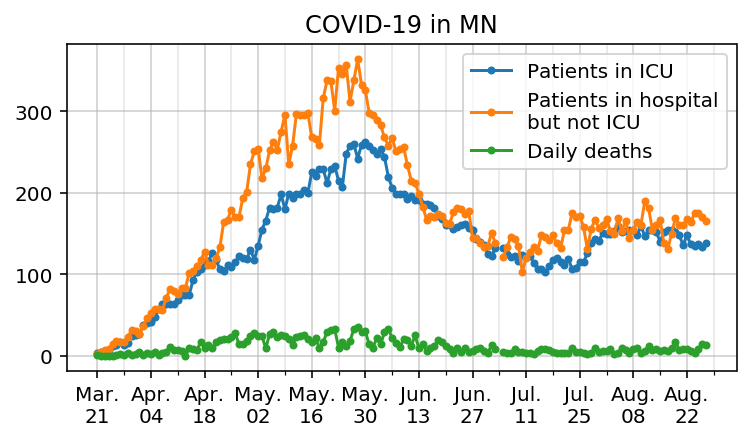

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

w = 3
fig, ax = plt.subplots(figsize=(2.0 * w, w))

style = ".-"
ax.plot(df.datetime, df["Hospitalized in ICU (daily)"], style, label="Patients in ICU")
ax.plot(df.datetime, df["Hospitalized, not in ICU (daily)"], style, label="Patients in hospital\nbut not ICU")
ax.plot(df.datetime, df["Newly reported deaths (daily)"], style, label="Daily deaths")
# ax.plot(df.datetime, df["Change in positive cases (daily)"], label="New positive tests")
# ax.set_yscale("log")
start = df.datetime.min()

weeks = [start + timedelta(k * 14) for k in range(52)]
ax.xaxis.set_major_locator(plt.FixedLocator([mdates.date2num(_) for _ in weeks]))

weeks = [start + timedelta(k * 14 + 7) for k in range(52)]
ax.xaxis.set_minor_locator(plt.FixedLocator([mdates.date2num(_) for _ in weeks]))
ax.grid(which="minor", axis="x", alpha=0.3)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b.\n%d"))
ax.grid(alpha=0.6)
ax.set_title("COVID-19 in MN")
ax.legend(loc="best")
# ax.set_ylabel("Number")
fig.savefig("imgs/mn.png", dpi=300, bbox_inches="tight")
fig.savefig("imgs/mn.svg", bbox_inches="tight")